Recursive search: 
['/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0004.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0008.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/beaver_0033.bmp', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0007.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0009.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0012.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0006.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0010.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0011.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0005.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/chair_0003.jpg', '/home/cesar/Desktop/imagenes/zero/test_images/test_images/accordionimage_0003.png', '/home/cesar/Desktop/imagenes/zero/test_images/test_images

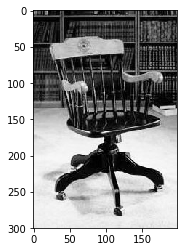

chair_0008


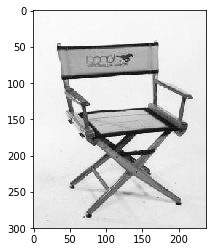

beaver_0033


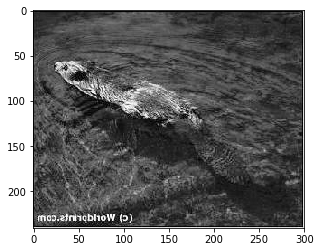

chair_0007


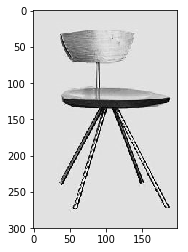

chair_0009


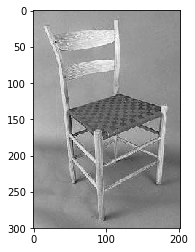

chair_0012


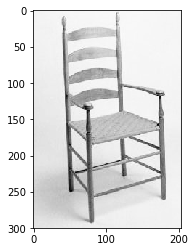

chair_0006


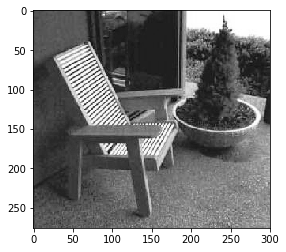

chair_0010


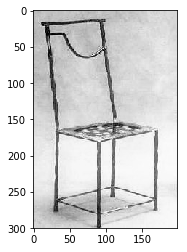

chair_0011


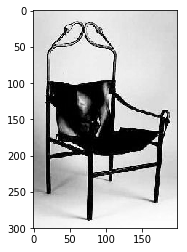

chair_0005


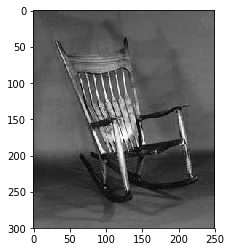

chair_0003


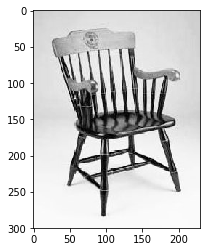

FileNotFoundError: [Errno 2] No such file or directory: '/home/cesar/Desktop/imagenes/zero/test_images/test_images/accordionimage_0003.png'

In [4]:
%paylab
%
from scipy import misc
import matplotlib.cm as cm # 
import matplotlib.pyplot as plt 
from skimage import data, io
import numpy as np
#from skimage.color import rgb2grays
import os
import fire

class CVHelper(object):
    """Utilities for image processing and computer vision apps"""

    def __init__(self, verbose=False):
        self.verbose = verbose
    


    def read(self,folder_path,formate,recursive=False,grayscale=False,folderout=""):

        image_list = []
        image = [".jpg", ".png", ".bmp", ".tiff"]
        nameimage=[]
        i=0
        if (recursive):
            print("Recursive search: ")
        else:
            print("Non-recursive search")

        for root, dirs, files in os.walk(folder_path):
            if recursive:
                for name in files:
                    (namef, extend) = os.path.splitext(name)
                    if extend in image:
                        if extend != ".DS_Store":
                            image_list.append(os.path.join(root, namef + extend))
                            nameimage.append(name.rstrip(extend))
                           

            else:
                while len(dirs) > 0:
                    dirs.pop()
                    for name in files:
                        (namef, extend) = os.path.splitext(name)
                        if (extend in image):
                            if (extend != ".DS_Store"):
                                image_list.append(root + namef + extend)                            
                                nameimage.append(name.rstrip(extend))
                                
        if self.verbose:
            print(image_list)
            
        def prom(pixel):
            return 0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2]     
        if grayscale:
            print("Change to scale Gray")
            for gray in image_list:
                
                gray_scale=io.imread(gray)
                grey = np.zeros((gray_scale.shape[0], gray_scale.shape[1]))
                for rownum in range(len(gray_scale)):
                    for colnum in range(len(gray_scale[rownum])):
                        grey[rownum][colnum] = prom(gray_scale[rownum][colnum])
                print(nameimage[i])
                ael=grey.astype(np.ubyte)
                plt.imshow(ael, cmap = cm.Greys_r)
                plt.show()
                out=os.path.join(folderout,nameimage[i])
                io.imsave(out+formate,ael)
                i+=1
            
         
            
            

#if __name__ =='__main__':
# fire.Fire(CVHelper)""""

path = "/home/cesar/Desktop/imagenes/zero/test_images/test_images/"
out= "/home/cesar/Desktop/grayscale"
cvhelper = CVHelper(True)
image_list = cvhelper.read(path,".jpg", True, True,out)

